Enter the hostel/flat rent =  10000
Enter the amount of food ordered =  3000
Enter the total of electricity spend =  250
Enter the charge per unit =  15
Enter the number of persons living in room/flat =  4
Do you want to apply a late fee or discount? (yes/no):  yes
Enter 'late fee' to add or 'discount' to subtract:  late fee
Enter the amount for the late fee or discount:  1500
Do you want to add additional utility charges? (yes/no):  no



--- Rent Calculation Summary ---
Total Rent: ₹10000.00
Total Food Cost: ₹3000.00
Electricity Bill: ₹3750.00
Adjustments (Late Fee/Discount): ₹1500.00
Total Cost (Rent + Food + Electricity + Adjustments + Utilities): ₹18250.00
Cost Per Person (split among 4): ₹4562.50


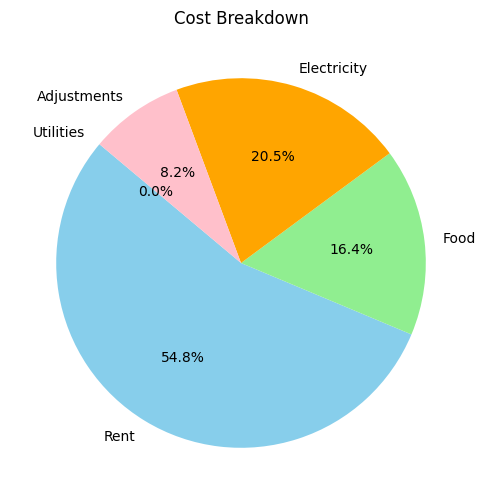

In [3]:
# Inputs we need from the user
# Total rent
# Total food ordered for snacking
# Electricity units spend
# Charge per unit
# Persons living in the room/flat
# adding late fee or discount 
# custom utility charges

import matplotlib.pyplot as plt

rent = float(input("Enter the hostel/flat rent = "))
food = float(input("Enter the amount of food ordered = "))
electricity_spend = float(input("Enter the total of electricity spend = "))
charge_per_unit = float(input("Enter the charge per unit = "))
persons = int(input("Enter the number of persons living in room/flat = "))

# Calculate Electricity Bill
total_electricity_bill = electricity_spend * charge_per_unit

# Adding late fee or discount
late_fee_or_discount = input("Do you want to apply a late fee or discount? (yes/no): ").strip().lower()
adjustment = 0
if late_fee_or_discount == "yes":
    while True:
        try:
            adjustment_type = input("Enter 'late fee' to add or 'discount' to subtract: ").strip().lower()
            adjustment_value = float(input("Enter the amount for the late fee or discount: "))
            if adjustment_value < 0:
                print("Please enter a positive value.")
                continue
            if adjustment_type == "late fee":
                adjustment = adjustment_value  # Add to the total
            elif adjustment_type == "discount":
                adjustment = -adjustment_value  # Subtract from the total
            else:
                print("Invalid option. Please enter 'late fee' or 'discount'.")
                continue
            break
        except ValueError:
            print("Invalid input. Please enter a valid number.")
else:
    print("No late fee or discount applied.")

# Custom utility charges
additional_charges = {}
add_more = input("Do you want to add additional utility charges? (yes/no): ").strip().lower()
while add_more == "yes":
    try:
        utility_name = input("Enter the utility name (e.g., Internet, Water): ").strip()
        utility_cost = float(input(f"Enter the cost for {utility_name}: "))
        if utility_cost < 0:
            print("Please enter a positive value.")
            continue
        additional_charges[utility_name] = utility_cost
        add_more = input("Do you want to add another utility? (yes/no): ").strip().lower()
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Calculate total additional charges
total_additional_charges = sum(additional_charges.values())

# Total Cost Calculation
total_cost = rent + food + total_electricity_bill + adjustment + total_additional_charges
per_person_cost = total_cost / persons

# Output Section
print("\n--- Rent Calculation Summary ---")
print(f"Total Rent: ₹{rent:.2f}")
print(f"Total Food Cost: ₹{food:.2f}")
print(f"Electricity Bill: ₹{total_electricity_bill:.2f}")
if adjustment != 0:
    print(f"Adjustments (Late Fee/Discount): ₹{adjustment:.2f}")
if additional_charges:
    print("Additional Utilities:")
    for name, cost in additional_charges.items():
        print(f"  {name}: ₹{cost:.2f}")
print(f"Total Cost (Rent + Food + Electricity + Adjustments + Utilities): ₹{total_cost:.2f}")
print(f"Cost Per Person (split among {persons}): ₹{per_person_cost:.2f}")

# Graphical Display with Matplotlib
labels = ['Rent', 'Food', 'Electricity', 'Adjustments', 'Utilities']
values = [rent, food, total_electricity_bill, adjustment, total_additional_charges]
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'violet']

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Cost Breakdown")
plt.show()

